Tutorial em texto para os inscritos no meu curso de Machine Learning na Udemy sobre classificação de dados utilizando o conjunto de dados Iris.

![Planta Iris](https://i.imgur.com/2MhMUmn.jpg)

Primeiramente importamos as bibliotecas que será utilizadas:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importamos também o *Iris Dataset*, o conjunto de dados que contém as características de três diferentes tipos de plantas: **Setosa**, **Versicolor**, **Virginica**.

In [2]:
data_iris = pd.read_csv('../input/Iris.csv')
df = pd.DataFrame(data=data_iris)

Podemos visualizar a quantidade de cada uma das espécies de plantas que o conjunto de dados possui:

In [3]:
data_iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Podemos visualizar as características de cada conjunto das diferentes espécies:

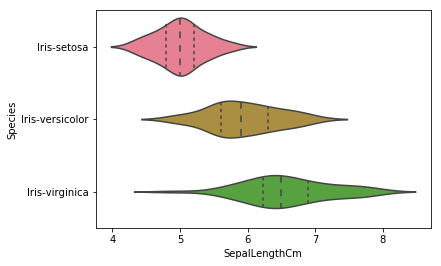

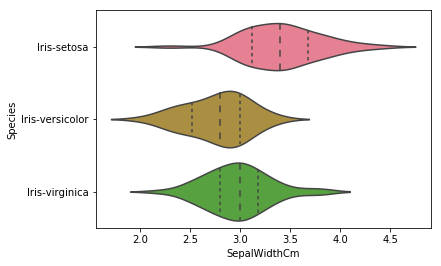

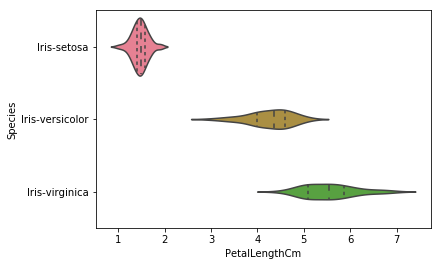

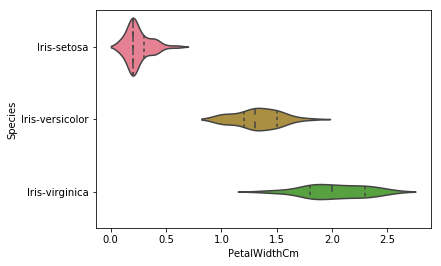

In [4]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data_iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data_iris, inner='quartile')
plt.show()

Criamos dois DataFrames derivados dos dados originais, um chamado de X onde retiramos as colunas 'Id' e 'Species', ficando apenas com as características de cada uma das plantas, e um outro denominado y onde colocamos as espécies (coluna 'Species') em separado. Veja:

In [5]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

Separamos os dados X e y em dois grupos. Os dados para treinamento do algoritmos e os dados para teste de precisão deste algoritmo.

*train* representa os dados que utilizaremos para treinar o algoritmo e *test* os dados que utilizaremos para testar a precisão.

Mas porquê fazer isso? A lógica é a seguinte:

Queremos treinar nosso algoritmo para que ele consiga classificar as subespécies da plata Iris de acordo com suas características. Assim, dividimos uma parte dos dados para treinar o algoritmo e uma outra parte serve como "dados novos", que o algoritmo nunca viu antes, então assim conseguimos medir se realmente o treinamento foi eficaz. Esta técnica é chamada de **Cross Validation**.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

E agora vamos ao modelo de **Machine Learning**! Utilizaremos o algoritmo K-nearest neighbors para esta análise.

In [7]:
model = KNeighborsClassifier(n_neighbors=8)

Em seguida executamos a função de aprendizagem do modelo utilizando os dados de treinamento.

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

Pronto! Nosso modelo está devidamente treinado. Ele aprendeu com os dados de treinamento e agora conseguirá identificar os diferentes tipos de plantas de acordo com suas características. Vamos então testar para ver se isso é verdade.

Utilizamos a função *predict* com dados de teste (X_test) para prever ou classificar qual tipo de espécie, e em seguinda analisamos a métrica **accuracy_score**:

In [9]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9833333333333333


O modelo possui uma precisão de **98%**, nada mal!

Podemos utilizar o modelo treinado para fazer uma previsão individual se quisermos. Digamos que pagássemos uma planta da espécie Iris, medíssemos suas características (dimensão das pétalas) e quiséssemos saber a qual subespécie ela pertence... basta fornecermos as características para o algoritmo:

In [10]:
print(model.predict([[6, 3, 4, 2]]))

['Iris-versicolor']
